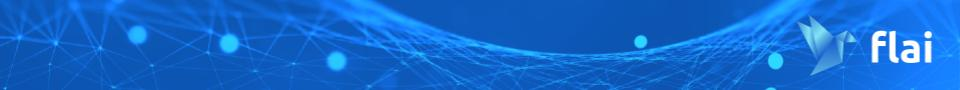

# **Aula 5 - Modelagem para Classificação: Regressão Logística**

## **Importação e Preparação dos Dados**

In [1]:
# importação via github 
import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS4/main/insurance.csv'
dados = pd.read_csv(url)

# mise un place
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

# separação de variáveis preditoras e variával resposta
X = dados[['bmi', 'charges']]
y = dados['smoker'] 

## **Upgrade na Técnica de Validação: _K-FOLD_**

In [2]:
# Configuração da Validação Cruzada

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

validacao = KFold(n_splits = 10, shuffle = True)

---
## **Regressão Logística**

In [3]:
from sklearn.linear_model import LogisticRegression 

modelo = LogisticRegression() 
reglog = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')   
reglog

{'fit_time': array([0.03567052, 0.03642702, 0.01647949, 0.01614189, 0.01788592,
        0.01974702, 0.02336693, 0.02452779, 0.01947141, 0.0187161 ]),
 'score_time': array([0.00344682, 0.00203252, 0.00231171, 0.00263882, 0.00313091,
        0.00320888, 0.00507712, 0.00360966, 0.00275159, 0.00321579]),
 'test_score': array([0.92537313, 0.89552239, 0.93283582, 0.94029851, 0.91791045,
        0.95522388, 0.97014925, 0.92537313, 0.94736842, 0.92481203])}

In [4]:
reglog['test_score']

array([0.92537313, 0.89552239, 0.93283582, 0.94029851, 0.91791045,
       0.95522388, 0.97014925, 0.92537313, 0.94736842, 0.92481203])

In [5]:
reglog['test_score'].mean()

0.9334867018291998

In [6]:
reglog = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision'])   

print('     Acurácia:', round(reglog['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(reglog['test_recall'].mean(), 4))
print('     Precisão:', round(reglog['test_precision'].mean(), 4))

     Acurácia: 0.9342
Sensibilidade: 0.8033
     Precisão: 0.8719


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


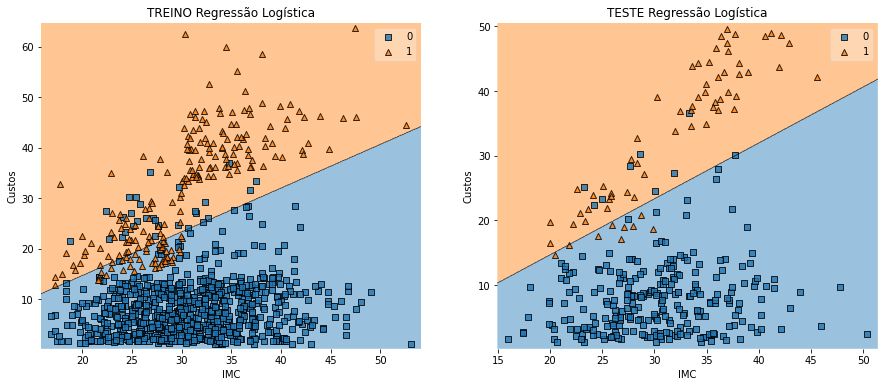

In [7]:
# Região de Decisão

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
 
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Regressão Logística')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Regressão Logística')   

plt.show()

---
## **KNN**

In [8]:
from sklearn.neighbors import KNeighborsClassifier 

k = 7
modelo = KNeighborsClassifier(n_neighbors = k) 
knn = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision']) 

print('     Acurácia:', round(knn['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(knn['test_recall'].mean(), 4))
print('     Precisão:', round(knn['test_precision'].mean(), 4))

     Acurácia: 0.9596
Sensibilidade: 0.9596
     Precisão: 0.8608


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


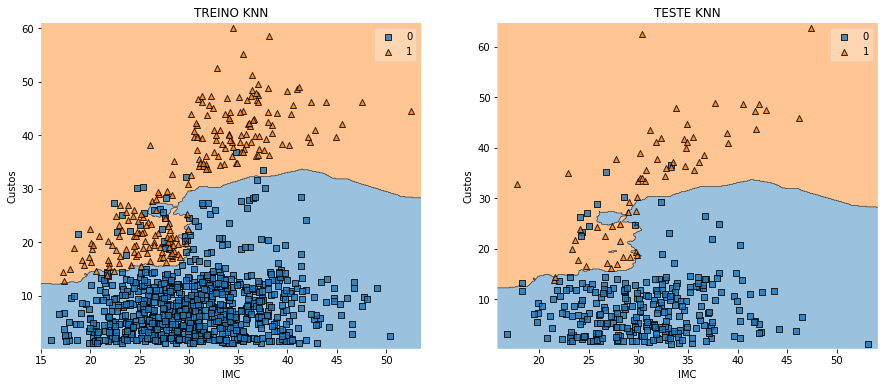

In [9]:
# Região de Decisão

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO KNN')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE KNN')   

plt.show()

---
## **Árvores de Decisão**

In [10]:
from sklearn.tree import DecisionTreeClassifier

profundidade = 5
amostra_minima = 20
modelo = DecisionTreeClassifier(max_depth = profundidade, min_samples_split = amostra_minima)
arvore = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision']) 

print('     Acurácia:', round(arvore['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(arvore['test_recall'].mean(), 4))
print('     Precisão:', round(arvore['test_precision'].mean(), 4))

     Acurácia: 0.9477
Sensibilidade: 0.8896
     Precisão: 0.8591


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


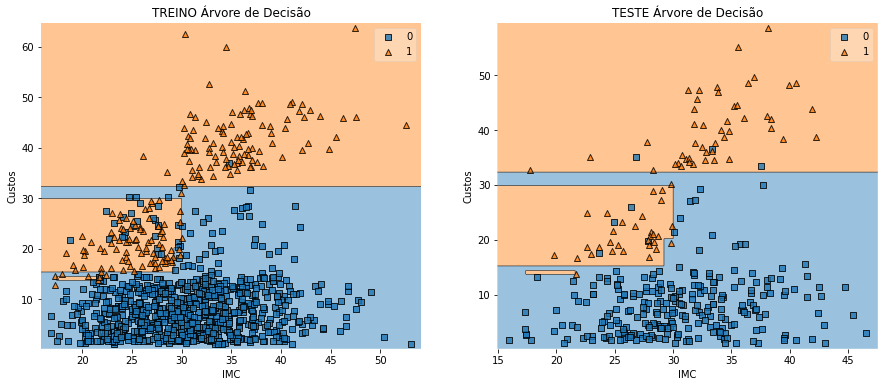

In [11]:
# Região de Decisão

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Árvore de Decisão')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Árvore de Decisão')   

plt.show()

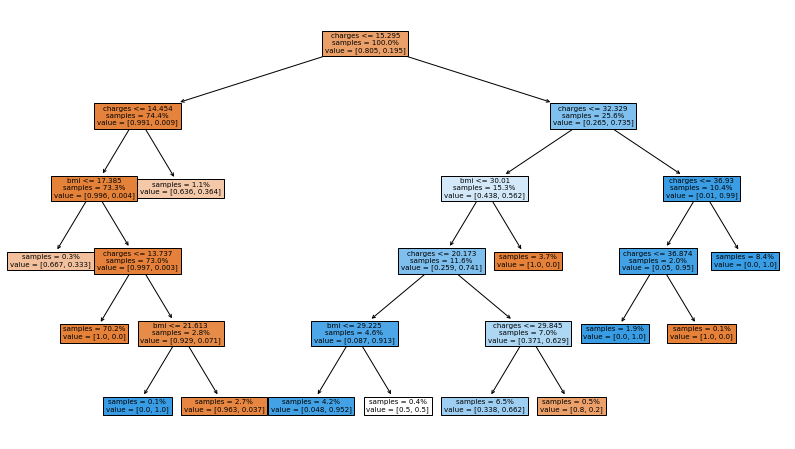

In [12]:
# Plot da Árvore

from sklearn.tree import plot_tree

plt.figure(figsize = (14, 8))
plot_tree(modelo, filled=True, proportion = True, impurity = False, feature_names = X.columns)
plt.show()

---
## **Comparação de Modelos via Validação Cruzada K-FOLD**

In [13]:
modelos = [LogisticRegression(), 
           KNeighborsClassifier(n_neighbors = 5), 
           KNeighborsClassifier(n_neighbors = 15),
           KNeighborsClassifier(n_neighbors = 25),
           KNeighborsClassifier(n_neighbors = 35),
           KNeighborsClassifier(n_neighbors = 45),
           DecisionTreeClassifier(max_depth = 1),
           DecisionTreeClassifier(max_depth = 2),
           DecisionTreeClassifier(max_depth = 3),
           DecisionTreeClassifier(max_depth = 4),
           DecisionTreeClassifier(max_depth = 5)]

nomes = ['Regressão Logística',
         'KNN - K = 5', 
         'KNN - K = 15', 
         'KNN - K = 25', 
         'KNN - K = 35', 
         'KNN - K = 45',
         'Árvore - Prof = 1',
         'Árvore - Prof = 2',
         'Árvore - Prof = 3',
         'Árvore - Prof = 4',
         'Árvore - Prof = 5']

accs = []
sens = []
vpps = []

for modelo in modelos:
    resultados = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision']) 
    accs.append(resultados['test_accuracy'].mean())
    sens.append(resultados['test_recall'].mean())
    vpps.append(resultados['test_precision'].mean())

aux = {'Acurácia': accs, 'Sensibilidade': sens, 'Precisão': vpps}
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by = 'Acurácia', ascending = False).round(4)

,Acurácia,Sensibilidade,Precisão
Árvore - Prof = 3,0.9626,0.9702,0.8650
KNN - K = 15,0.9596,0.9648,0.8500
Árvore - Prof = 4,0.9596,0.9584,0.8603
KNN - K = 45,0.9589,0.9636,0.8548
KNN - K = 25,0.9589,0.9661,0.8624
KNN - K = 35,0.9581,0.9561,0.8581
KNN - K = 5,0.9552,0.9325,0.8629
Árvore - Prof = 5,0.9522,0.9128,0.8613
Regressão Logística,0.9313,0.8010,0.8520
Árvore - Prof = 2,0.9267,0.9604,0.7595


---

# **Exercícios Propostos**

# Encontre os parâmetros que levam o KNN e a Árvore de Decisão ao melhor resultado, justificando seu raciocínio. Investigue a variabilidade dos resultados obtidos através da Validação Cruzada K-FOLD.

---

**_#itstimetoflai_** 

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 

In [18]:
modelos = [KNeighborsClassifier(n_neighbors = 1),
           KNeighborsClassifier(n_neighbors = 2),
           KNeighborsClassifier(n_neighbors = 3),
           KNeighborsClassifier(n_neighbors = 4),
           KNeighborsClassifier(n_neighbors = 5),
           KNeighborsClassifier(n_neighbors = 10),
           KNeighborsClassifier(n_neighbors = 15),
           KNeighborsClassifier(n_neighbors = 20),
           KNeighborsClassifier(n_neighbors = 25),
           KNeighborsClassifier(n_neighbors = 30),
           KNeighborsClassifier(n_neighbors = 35),
           KNeighborsClassifier(n_neighbors = 40),
           KNeighborsClassifier(n_neighbors = 45),
           KNeighborsClassifier(n_neighbors = 50),
           KNeighborsClassifier(n_neighbors = 55),
           KNeighborsClassifier(n_neighbors = 1, weights = 'distance'),
           KNeighborsClassifier(n_neighbors = 2, weights = 'distance'),
           KNeighborsClassifier(n_neighbors = 3, weights = 'distance'),
           KNeighborsClassifier(n_neighbors = 4, weights = 'distance'),
           KNeighborsClassifier(n_neighbors = 5, weights = 'distance'),
           KNeighborsClassifier(n_neighbors = 10, weights = 'distance'),
           KNeighborsClassifier(n_neighbors = 15, weights = 'distance'),
           KNeighborsClassifier(n_neighbors = 20, weights = 'distance'),
           KNeighborsClassifier(n_neighbors = 25, weights = 'distance'),
           KNeighborsClassifier(n_neighbors = 30, weights = 'distance'),
           KNeighborsClassifier(n_neighbors = 35, weights = 'distance'),
           KNeighborsClassifier(n_neighbors = 40, weights = 'distance'),
           KNeighborsClassifier(n_neighbors = 45, weights = 'distance'),
           KNeighborsClassifier(n_neighbors = 50, weights = 'distance'),
           KNeighborsClassifier(n_neighbors = 55, weights = 'distance'),
           DecisionTreeClassifier(max_depth = 1, min_samples_split = 2),
           DecisionTreeClassifier(max_depth = 2, min_samples_split = 2),
           DecisionTreeClassifier(max_depth = 3, min_samples_split = 2),
           DecisionTreeClassifier(max_depth = 4, min_samples_split = 2),
           DecisionTreeClassifier(max_depth = 5, min_samples_split = 2),
           DecisionTreeClassifier(max_depth = 6, min_samples_split = 2),
           DecisionTreeClassifier(max_depth = 1, min_samples_split = 3),
           DecisionTreeClassifier(max_depth = 2, min_samples_split = 3),
           DecisionTreeClassifier(max_depth = 3, min_samples_split = 3),
           DecisionTreeClassifier(max_depth = 4, min_samples_split = 3),
           DecisionTreeClassifier(max_depth = 5, min_samples_split = 3),
           DecisionTreeClassifier(max_depth = 6, min_samples_split = 3),
           DecisionTreeClassifier(max_depth = 1, min_samples_split = 4),
           DecisionTreeClassifier(max_depth = 2, min_samples_split = 4),
           DecisionTreeClassifier(max_depth = 3, min_samples_split = 4),
           DecisionTreeClassifier(max_depth = 4, min_samples_split = 4),
           DecisionTreeClassifier(max_depth = 5, min_samples_split = 4),
           DecisionTreeClassifier(max_depth = 6, min_samples_split = 4),
           DecisionTreeClassifier(max_depth = 1, min_samples_split = 5),
           DecisionTreeClassifier(max_depth = 2, min_samples_split = 5),
           DecisionTreeClassifier(max_depth = 3, min_samples_split = 5),
           DecisionTreeClassifier(max_depth = 4, min_samples_split = 5),
           DecisionTreeClassifier(max_depth = 5, min_samples_split = 5),
           DecisionTreeClassifier(max_depth = 6, min_samples_split = 5),]

nomes = ['KNN - 1',
         'KNN - 2',
         'KNN - 3',
         'KNN - 4',
         'KNN - 5',
         'KNN - 10',
         'KNN - 15',
         'KNN - 20',
         'KNN - 25',
         'KNN - 30',
         'KNN - 35',
         'KNN - 40',
         'KNN - 45',
         'KNN - 50',
         'KNN - 55',
         'KNN - 1 e peso = distance',
         'KNN - 2 e peso = distance',
         'KNN - 3 e peso = distance',
         'KNN - 4 e peso = distance',
         'KNN - 5 e peso = distance',
         'KNN - 10 e peso = distance',
         'KNN - 15 e peso = distance',
         'KNN - 20 e peso = distance',
         'KNN - 25 e peso = distance',
         'KNN - 30 e peso = distance',
         'KNN - 35 e peso = distance',
         'KNN - 40 e peso = distance',
         'KNN - 45 e peso = distance',
         'KNN - 50 e peso = distance',
         'KNN - 55 e peso = distance',
         'Árvore - profundidade = 1 e min_samples_split = 2',
         'Árvore - profundidade = 2 e min_samples_split = 2',
         'Árvore - profundidade = 3 e min_samples_split = 2',
         'Árvore - profundidade = 4 e min_samples_split = 2',
         'Árvore - profundidade = 5 e min_samples_split = 2',
         'Árvore - profundidade = 6 e min_samples_split = 2',
         'Árvore - profundidade = 1 e min_samples_split = 3',
         'Árvore - profundidade = 2 e min_samples_split = 3',
         'Árvore - profundidade = 3 e min_samples_split = 3',
         'Árvore - profundidade = 4 e min_samples_split = 3',
         'Árvore - profundidade = 5 e min_samples_split = 3',
         'Árvore - profundidade = 6 e min_samples_split = 3',
         'Árvore - profundidade = 1 e min_samples_split = 4',
         'Árvore - profundidade = 2 e min_samples_split = 4',
         'Árvore - profundidade = 3 e min_samples_split = 4',
         'Árvore - profundidade = 4 e min_samples_split = 4',
         'Árvore - profundidade = 5 e min_samples_split = 4',
         'Árvore - profundidade = 6 e min_samples_split = 4',
         'Árvore - profundidade = 1 e min_samples_split = 5',
         'Árvore - profundidade = 2 e min_samples_split = 5',
         'Árvore - profundidade = 3 e min_samples_split = 5',
         'Árvore - profundidade = 4 e min_samples_split = 5',
         'Árvore - profundidade = 5 e min_samples_split = 5',
         'Árvore - profundidade = 6 e min_samples_split = 5',]

validacao = KFold(n_splits = 10, shuffle = True)

accs = []
sens = []
vpps = []

for modelo in modelos:
    resultados = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision']) 
    accs.append(resultados['test_accuracy'].mean())
    sens.append(resultados['test_recall'].mean())
    vpps.append(resultados['test_precision'].mean())

aux = {'Acurácia': accs, 'Sensibilidade': sens, 'Precisão': vpps}
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by = 'Acurácia', ascending = False).round(4)




,Acurácia,Sensibilidade,Precisão
Árvore - profundidade = 3 e min_samples_split = 4,0.9664,0.9727,0.8723
Árvore - profundidade = 3 e min_samples_split = 5,0.9656,0.9765,0.8717
KNN - 20 e peso = distance,0.9649,0.9653,0.8747
Árvore - profundidade = 3 e min_samples_split = 3,0.9641,0.9660,0.8768
KNN - 30 e peso = distance,0.9634,0.9720,0.8624
KNN - 40 e peso = distance,0.9619,0.9657,0.8631
KNN - 15 e peso = distance,0.9619,0.9637,0.8630
Árvore - profundidade = 3 e min_samples_split = 2,0.9619,0.9595,0.8653
KNN - 25 e peso = distance,0.9619,0.9602,0.8588
KNN - 30,0.9619,0.9617,0.8727


# Região de Decisão do primeiro colocado 

     Acurácia: 0.9619
Sensibilidade: 0.9622
     Precisão: 0.8657


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


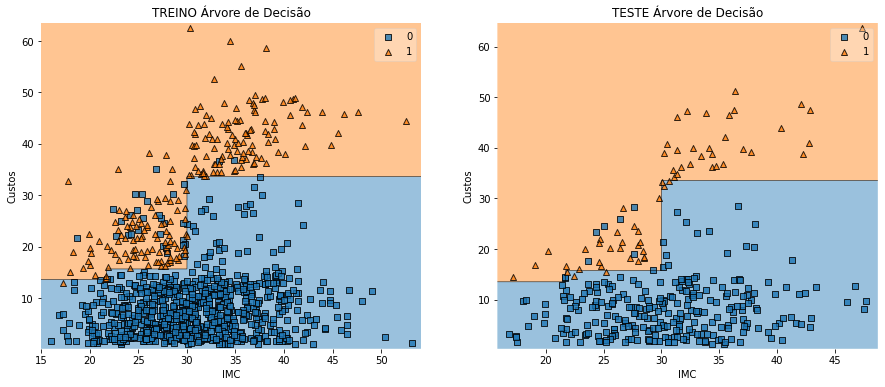

In [22]:
# Região de Decisão do primeiro colocado 

from sklearn.tree import DecisionTreeClassifier

profundidade = 3
amostra_minima = 4
primeiromodelo = DecisionTreeClassifier(max_depth = profundidade, min_samples_split = amostra_minima)
arvore = cross_validate(primeiromodelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision']) 

print('     Acurácia:', round(arvore['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(arvore['test_recall'].mean(), 4))
print('     Precisão:', round(arvore['test_precision'].mean(), 4))

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
primeiromodelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = primeiromodelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Árvore de Decisão')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = primeiromodelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Árvore de Decisão')   

plt.show()

#Região de decisão do Segundo Colocado 

     Acurácia: 0.9619
Sensibilidade: 0.9643
     Precisão: 0.8685


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


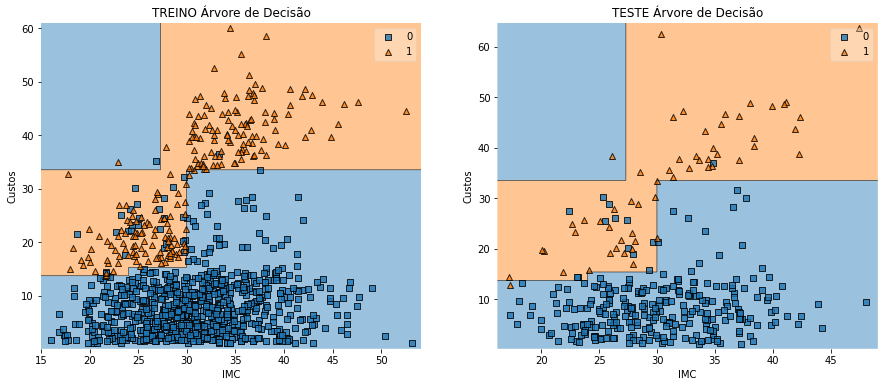

In [23]:
from sklearn.tree import DecisionTreeClassifier

profundidade = 3
amostra_minima = 5
segundomodelo = DecisionTreeClassifier(max_depth = profundidade, min_samples_split = amostra_minima)
arvore = cross_validate(segundomodelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision']) 

print('     Acurácia:', round(arvore['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(arvore['test_recall'].mean(), 4))
print('     Precisão:', round(arvore['test_precision'].mean(), 4))

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
segundomodelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = segundomodelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Árvore de Decisão')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = segundomodelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Árvore de Decisão')   

plt.show()

#Região de Decisão Terceiro colocado

     Acurácia: 0.9619
Sensibilidade: 0.9651
     Precisão: 0.8682


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


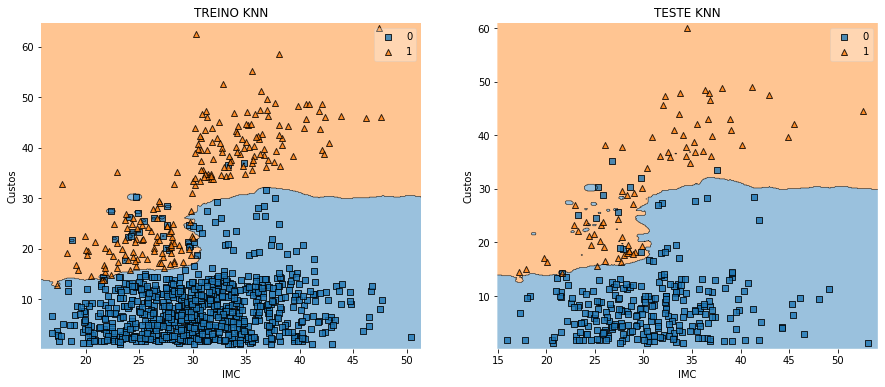

In [24]:
from sklearn.neighbors import KNeighborsClassifier 

k = 20
terceiromodelo = KNeighborsClassifier(n_neighbors = k, weights='distance') 
knn = cross_validate(terceiromodelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision']) 

print('     Acurácia:', round(knn['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(knn['test_recall'].mean(), 4))
print('     Precisão:', round(knn['test_precision'].mean(), 4))


Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
terceiromodelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = terceiromodelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO KNN')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = terceiromodelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE KNN')   

plt.show()